In [1]:
# %matplotlib inline
%time from hikyuu.interactive import *

2025-11-04 11:31:07,175 [INFO] runing in interactive session [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:131) [hikyuu::hku_info]
2025-11-04 11:31:07,175 [INFO] running in jupyter [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:138) [hikyuu::hku_info]


2025-11-04 11:31:07.187 [HKU-I] - Plugin path: F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\plugin (StockManager.cpp:113)
2025-11-04 11:31:07.378 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-11-04 11:31:07.381 [HKU-I] - 加载市场信息…… (StockManager.cpp:704)
2025-11-04 11:31:07.382 [HKU-I] - 加载证券类型信息…… (StockManager.cpp:722)
2025-11-04 11:31:07.383 [HKU-I] - 加载证券信息…… (StockManager.cpp:602)
2025-11-04 11:31:07.524 [HKU-I] - 加载权息数据…… (StockManager.cpp:740)
2025-11-04 11:31:07.717 [HKU-I] - 加载板块信息…… (StockManager.cpp:182)
2025-11-04 11:31:08.043 [HKU-I] - 加载K线数据…… (StockManager.cpp:186)
2025-11-04 11:31:08.044 [HKU-I] - 预加载 day K线数据至缓存 (最大数量: 100000)! (StockManager.cpp:231)
2025-11-04 11:31:08.045 [HKU-I] - 0.66 秒数据加载完毕. (StockManager.cpp:193)
CPU times: total: 3.67 s
Wall time: 3.7 s


In [52]:
# 统计新高新低

# 新高
NH = HIGH() >= HHV(HIGH(), 60)
NL = LOW() <= LLV(LOW(), 60)

# 统计
def stock_filter(stk: Stock):

    # 上市一年以上
    # ipc_1year = (stk.start_datetime + Days(365) < Datetime.today())
    # start_0 = stk.code.startswith('000')
    not_st = 'ST' not in stk.name
    # 所属市场如下
    return (
        # ipc_1year and 
            # start_0 and
            not_st and
            (stk.type == constant.STOCKTYPE_A or
            stk.type == constant.STOCKTYPE_GEM or
            stk.type == constant.STOCKTYPE_START or
            stk.type == constant.STOCKTYPE_A_BJ))

stk_list = sm.get_stock_list(stock_filter)
# stk_list.sort(key=lambda x: x.start_datetime)

# stk_list.sort(key=lambda x: x.market)
print(len(stk_list))

# 统计这批票里面新高的数量
q = Query(-200, recover_type=Query.FORWARD)
nh_ind = INSUM(stk_list, q, ind=NH,  mode=0)
print(nh_ind)

nl_ind = INSUM(stk_list, q, ind=NL,  mode=0)
print(nl_ind)



5265
Indicator{
  name: INSUM
  size: 200
  discard: 0
  result sets: 1
  params: params[block(Block): Block(, ), fill_null(bool): 1, ignore_context(bool): 0, kdata(KData): Null, market(string): SH, mode(int): 0, query(Query): KQuery(-200, 9223372036854775807, INDEX, DAY, FORWARD), ]
  support indicator param: False
  formula: INSUM(HIGH >= HHV(HIGH))
  values0: [4940, 599, 675, ..., 281, 221, 245]
}
Indicator{
  name: INSUM
  size: 200
  discard: 0
  result sets: 1
  params: params[block(Block): Block(, ), fill_null(bool): 1, ignore_context(bool): 0, kdata(KData): Null, market(string): SH, mode(int): 0, query(Query): KQuery(-200, 9223372036854775807, INDEX, DAY, FORWARD), ]
  support indicator param: False
  formula: INSUM(LOW <= LLV(LOW))
  values0: [5126, 4586, 1005, ..., 183, 146, 113]
}


In [9]:
help(select)
help(select2)

Help on function select in module hikyuu:

select(cond, start=Datetime(2018,1,1,0,0,0,0,0), end=Datetime(2025,11,4,11,31,7,175,629), print_out=True)
    示例：
    #选出涨停股
    C = CLOSE()
    x = select(C / REF(C, 1) - 1 >= 0.0995)

    :param Indicator cond: 条件指标
    :param Datetime start: 起始日期
    :param Datetime end: 结束日期
    :param bool print_out: 打印选中的股票
    :rtype: 选中的股票列表

Help on function select2 in module hikyuu:

select2(inds, start=Datetime(2018,1,1,0,0,0,0,0), end=Datetime(2025,11,4,11,31,7,175,629), stks=None)
    导出最后时刻指定证券的所有指定指标值

    如：
        select2([CLOSE(), VOLUME()], stks=blocka)

    返回一个DataFrame, 列名是指标名称, 行是证券代码和证券名称:

        证券代码  证券名称  CLOSE  VOLUME
        SH600000 浦发银行  14.09   1000
        SH600001 中国平安  13.09   2000
        SZ000001 平安银行  13.09   3000
        ...

    :param Indicator inds: 指标列表
    :param Datetime start: 起始日期
    :param Datetime end: 结束日期（不包括该日期）
    :param list stks: 指定的证券列表
    :rtype: pandas.DataFrame



In [63]:
print(len(zsbk_a))

for s in zsbk_a:
    if not s.valid:
        continue
    print(s)


3464
Stock(SH, 603235, 天新药业, A股, 1, 2022-07-12 00:00:00, +infinity)
Stock(SH, 605299, 舒华体育, A股, 1, 2020-12-15 00:00:00, +infinity)
Stock(SH, 603976, 正川股份, A股, 1, 2017-08-22 00:00:00, +infinity)
Stock(SH, 603266, 天龙股份, A股, 1, 2017-01-10 00:00:00, +infinity)
Stock(BJ, 920508, 殷图网联, 北交所, 1, 2020-07-27 00:00:00, +infinity)
Stock(SH, 600959, 江苏有线, A股, 1, 2015-04-28 00:00:00, +infinity)
Stock(SH, 601101, 昊华能源, A股, 1, 2010-03-31 00:00:00, +infinity)
Stock(SH, 601519, 大智慧, A股, 1, 2011-01-28 00:00:00, +infinity)
Stock(BJ, 920914, 远航精密, 北交所, 1, 2022-11-11 00:00:00, +infinity)
Stock(SH, 605186, 健麾信息, A股, 1, 2020-12-22 00:00:00, +infinity)
Stock(SH, 601216, 君正集团, A股, 1, 2011-02-22 00:00:00, +infinity)
Stock(SH, 603236, 移远通信, A股, 1, 2019-07-16 00:00:00, +infinity)
Stock(SH, 601518, 吉林高速, A股, 1, 2010-03-19 00:00:00, +infinity)
Stock(SH, 600405, 动力源, A股, 1, 2004-04-01 00:00:00, +infinity)
Stock(SH, 603237, 五芳斋, A股, 1, 2022-08-31 00:00:00, +infinity)
Stock(SH, 600688, 上海石化, A股, 1, 1993-11-08 00:00:00,

In [43]:
# 扩展select函数
def my_select(cond, start=Datetime(202501010000), end=Datetime.now(), block_list=[], print_out=True):
    q = Query(start, end)
    d = sm.get_trading_calendar(q, 'SH')
    if len(d) == 0:
        return
        
    result = []
    for b in block_list:
        for s in b:
            if not s.valid:
                continue
    
            k = s.get_kdata(q)
            if len(k) == 0 or k[-1].datetime != d[-1]:
                continue
    
            cond.set_context(k)
            if len(cond) > 0 and not isnan(cond[-1]) and cond[-1] > 0:
                result.append(s)
                if print_out:
                    print(d[-1], s)

    return result

In [49]:
NH_60 = HIGH() >= HHV(HIGH(), 60)
# NL_60 = LOW() <= LLV(LOW(), 60)
x = my_select(cond=NH_60, 
              start=Datetime(2025,1,3,0,0,0,0,0), 
              end=Datetime(2025,11,4,0,0,0,0,0), 
              block_list=[blocksh, blocksz, blockg, blockstart, blockbj], print_out=False)
print(len(x))
# x = select(NL_60)
# print(len(x))
# print(x[0].code)
x.sort(key=lambda x: x.code)
for b in x:
    print(b)

266
Stock(SZ, 000007, 全新好, A股, 1, 1992-04-13 00:00:00, +infinity)
Stock(SZ, 000510, 新金路, A股, 1, 1993-05-07 00:00:00, +infinity)
Stock(SZ, 000555, 神州信息, A股, 1, 1994-04-08 00:00:00, +infinity)
Stock(SZ, 000567, 海德股份, A股, 1, 1994-05-25 00:00:00, +infinity)
Stock(SZ, 000586, 汇源通信, A股, 1, 1995-12-20 00:00:00, +infinity)
Stock(SZ, 000589, 贵州轮胎, A股, 1, 1996-03-08 00:00:00, +infinity)
Stock(SZ, 000592, 平潭发展, A股, 1, 1996-03-27 00:00:00, +infinity)
Stock(SZ, 000608, *ST阳光, A股, 1, 1996-09-19 00:00:00, +infinity)
Stock(SZ, 000609, ST中迪, A股, 1, 1996-10-10 00:00:00, +infinity)
Stock(SZ, 000615, *ST美谷, A股, 1, 1996-10-16 00:00:00, +infinity)
Stock(SZ, 000638, *ST万方, A股, 1, 1996-11-26 00:00:00, +infinity)
Stock(SZ, 000663, 永安林业, A股, 1, 1996-12-06 00:00:00, +infinity)
Stock(SZ, 000682, 东方电子, A股, 1, 1997-01-21 00:00:00, +infinity)
Stock(SZ, 000735, 罗 牛 山, A股, 1, 1997-06-11 00:00:00, +infinity)
Stock(SZ, 000736, *ST中地, A股, 1, 1997-04-25 00:00:00, +infinity)
Stock(SZ, 000766, 通化金马, A股, 1, 1997-04-30 00:00:

KData{
  size : 100
  stock: Stock(SH, 688031, 星环科技, 科创板, 1, 2022-10-18 00:00:00, +infinity),
  query: KQuery(-100, 9223372036854775807, INDEX, DAY, NO_RECOVER)
  first: KRecord(Datetime(20250609000000), 48.4500, 49.3300, 47.8600, 48.6600, 11363.0000, 23341.0000)
  last: KRecord(Datetime(20251103000000), 64.9100, 73.5000, 63.0000, 72.6600, 86833.2000, 128217.0000)
}


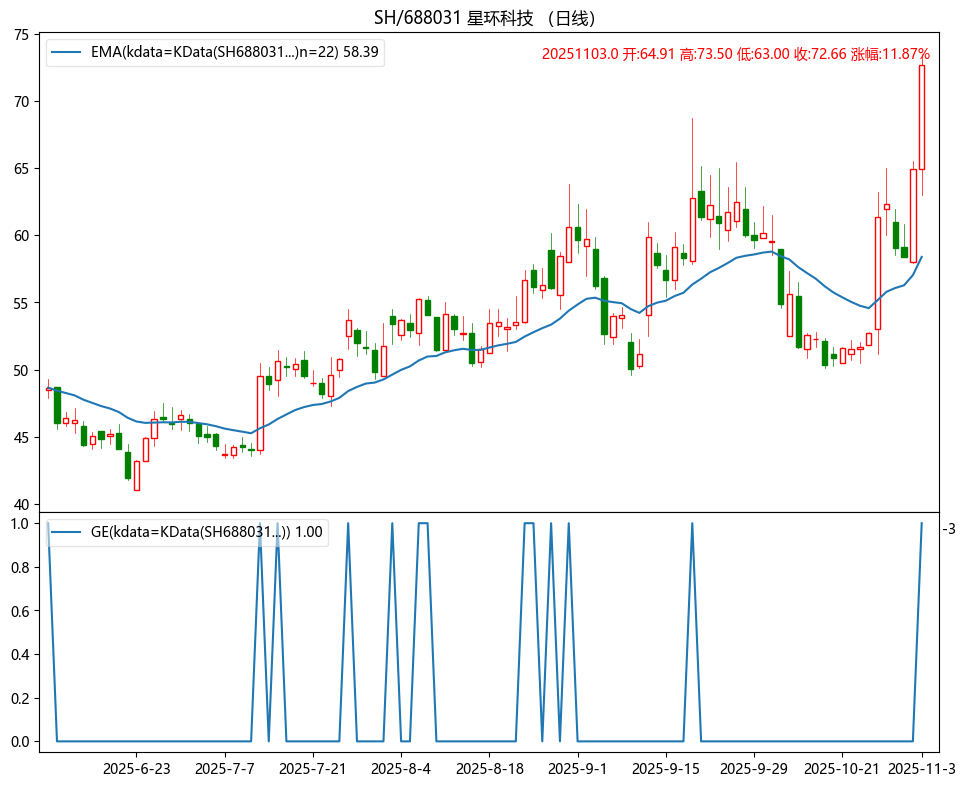

In [41]:
NH_60 = HIGH() >= HHV(HIGH(), 60)

s = sm['sh688031']

# s = sm['sz300502']
k = s.get_kdata(Query(-100))
print(k)

#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
ma = EMA(CLOSE(k))
ma.plot(axes=ax1, legend_on=True)

#在第二个坐标轴中绘制艾尔德力度指标
v = NH_60(k)
v.plot(axes=ax2, legend_on=True)